## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import math

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [4]:
def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [5]:
k = 3
n = 5
cards = sample_cards(100, n, k)
cards

array([[31, 56, 80],
       [25, 29, 45],
       [22, 30, 89],
       [53, 86, 98],
       [50, 69, 94]])

We now generate a template with tihe same shape than the cards but with the players ids so we can track them after sorting.

In [6]:
player_ids = np.tile(np.arange(1, n+1), (k,1)).T
player_ids

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4],
       [5, 5, 5]])

The lowest card in the game is

In [7]:
np.min(cards)

22

In [8]:
flat_cards, flat_ids = cards.flatten(), player_ids.flatten()
# sort cards, but get the indices instead
order_ids = np.argsort(flat_cards)
# and this is how we recover the ordered cards
flat_cards[order_ids]

array([22, 25, 29, 30, 31, 45, 50, 53, 56, 69, 80, 86, 89, 94, 98])

Now we can just compute the consecutive differences between the two list to compute the gaps. Also we can do this for the ids, and when the consecutive gap corresponds to zero, that means the gap is zero and we just exluded from calculations.

In [9]:
gap_cards = np.diff(flat_cards[order_ids])
gap_cards

array([ 3,  4,  1,  1, 14,  5,  3,  3, 13, 11,  6,  3,  5,  4])

In [10]:
gap_ids = np.diff(flat_ids[order_ids])
gap_ids

array([-1,  0,  1, -2,  1,  3, -1, -3,  4, -4,  3, -1,  2, -1])

and noew we can just cancel the terms for which the players are the same:

In [11]:
gap_unique = gap_cards * (gap_ids != 0)
gap_unique

array([ 3,  0,  1,  1, 14,  5,  3,  3, 13, 11,  6,  3,  5,  4])

In [12]:
np.max(gap_unique)

14

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

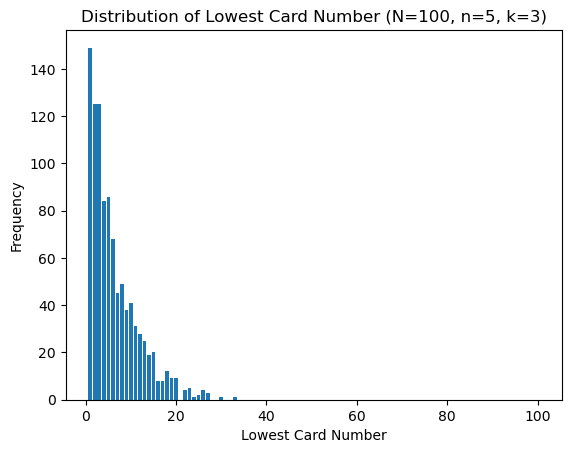

In [13]:
# To Do cell
def simulate_and_plot(N, n, k, num_samples):
    lowest_numbers = []

    for _ in range(num_samples):
        cards = sample_cards(N, n, k)
        lowest_numbers.append(np.min(cards))
    
    # Plotting the histogram
    plt.hist(lowest_numbers, bins=np.arange(1, N+2), align='left', rwidth=0.8)
    plt.xlabel("Lowest Card Number")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Lowest Card Number (N={N}, n={n}, k={k})")
    plt.show()

# Parameters
N = 100  # Total number of cards
n = 5    # Number of players
k = 3    # Number of cards per player
num_samples = 1000  # Number of times to repeat the sampling

# Run the simulation and plot the histogram
simulate_and_plot(N, n, k, num_samples)


### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

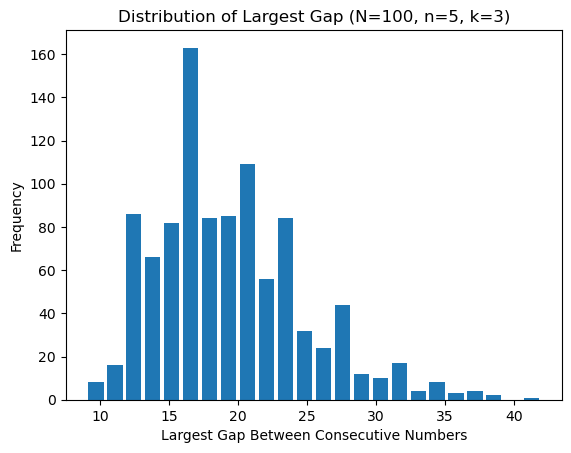

In [14]:
# To Do cell
def largest_gap_among_all_cards(cards):
    flat_cards = cards.flatten()
    order_ids = np.argsort(flat_cards)
    gap_cards = np.diff(flat_cards[order_ids])
    return np.max(gap_cards)

def simulate_and_plot(N, n, k, num_samples):
    largest_gaps = []

    for _ in range(num_samples):
        cards = sample_cards(N, n, k)
        largest_gap = largest_gap_among_all_cards(cards)
        largest_gaps.append(largest_gap)
    
    # Plotting the histogram
    plt.hist(largest_gaps, bins='auto', rwidth=0.8)
    plt.xlabel("Largest Gap Between Consecutive Numbers")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Largest Gap (N={N}, n={n}, k={k})")
    plt.show()

# Parameters
N = 100  # Total number of cards
n = 5    # Number of players
k = 3    # Number of cards per player
num_samples = 1000  # Number of times to repeat the sampling

# Run the simulation and plot the histogram of largest gaps
simulate_and_plot(N, n, k, num_samples)

Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

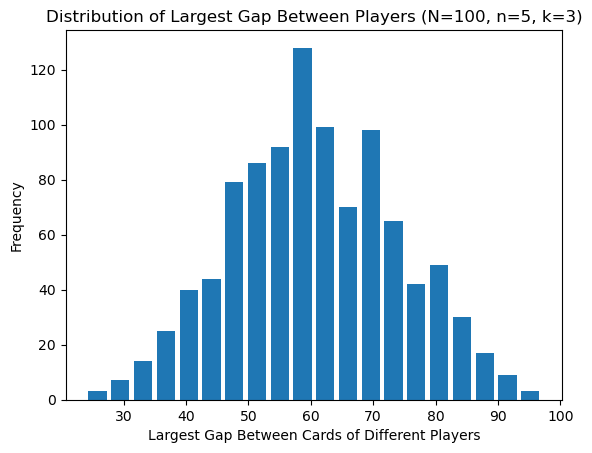

In [15]:
#To Do cell

def largest_gap_between_players(cards):
    num_players, num_cards_per_player = cards.shape
    gap_between_players = []

    for i in range(num_cards_per_player - 1):
        player_i_cards = cards[:, i]
        player_i_next_card = cards[:, i + 1]
        gap = player_i_next_card - player_i_cards
        gap_between_players.append(np.max(gap))
    
    return max(gap_between_players)

def simulate_and_plot(N, n, k, num_samples):
    largest_gaps = []

    for _ in range(num_samples):
        cards = sample_cards(N, n, k)
        largest_gap = largest_gap_between_players(cards)
        largest_gaps.append(largest_gap)
    
    # Plotting the histogram
    plt.hist(largest_gaps, bins='auto', rwidth=0.8)
    plt.xlabel("Largest Gap Between Cards of Different Players")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Largest Gap Between Players (N={N}, n={n}, k={k})")
    plt.show()

# Parameters
N = 100  # Total number of cards
n = 5    # Number of players
k = 3    # Number of cards per player
num_samples = 1000  # Number of times to repeat the sampling

# Run the simulation and plot the histogram of largest gaps between players
simulate_and_plot(N, n, k, num_samples)

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

In [16]:
#To Do cell

def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represents each player, and each column represents their card in ascending order. 
    """
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n, k)
    _cards.sort(axis=1)
    return _cards

def largest_gap_among_all_cards(cards):
    flat_cards = cards.flatten()
    order_ids = np.argsort(flat_cards)
    gap_cards = np.diff(flat_cards[order_ids])
    return np.max(gap_cards)

def largest_gap_between_players(cards):
    num_players, num_cards_per_player = cards.shape
    gap_between_players = []

    for i in range(num_cards_per_player - 1):
        player_i_cards = cards[:, i]
        player_i_next_card = cards[:, i + 1]
        gap = player_i_next_card - player_i_cards
        gap_between_players.append(np.max(gap))
    
    return max(gap_between_players)

def simulate_and_compare(N, n, k, num_samples):
    largest_gaps_all = []
    largest_gaps_between_players = []

    for _ in range(num_samples):
        cards = sample_cards(N, n, k)
        largest_gap_all = largest_gap_among_all_cards(cards)
        largest_gaps_all.append(largest_gap_all)
        largest_gap_between = largest_gap_between_players(cards)
        largest_gaps_between_players.append(largest_gap_between)
    
    # Calculate means
    mean_gap_all = np.mean(largest_gaps_all)
    mean_gap_between_players = np.mean(largest_gaps_between_players)

    return mean_gap_all, mean_gap_between_players

# Parameters
num_samples = 1000  # Number of times to repeat the sampling
N_values = [50, 100, 200]  # Different choices of the total number of cards
n_values = [4, 5, 6, 7]    # Different choices of the total number of players
k = 3                      # Number of cards per player

# Perform simulations and compare means
for N in N_values:
    for n in n_values:
        mean_gap_all, mean_gap_between_players = simulate_and_compare(N, n, k, num_samples)
        print(f"N={N}, n={n}")
        print(f"Mean Gap Among All Cards: {mean_gap_all}")
        print(f"Mean Gap Between Players: {mean_gap_between_players}")
        print("Difference:", mean_gap_all - mean_gap_between_players)
        print("======================")


N=50, n=4
Mean Gap Among All Cards: 10.682
Mean Gap Between Players: 28.932
Difference: -18.25
N=50, n=5
Mean Gap Among All Cards: 9.108
Mean Gap Between Players: 30.205
Difference: -21.096999999999998
N=50, n=6
Mean Gap Among All Cards: 7.886
Mean Gap Between Players: 31.293
Difference: -23.407
N=50, n=7
Mean Gap Among All Cards: 6.89
Mean Gap Between Players: 32.265
Difference: -25.375
N=100, n=4
Mean Gap Among All Cards: 22.685
Mean Gap Between Players: 58.348
Difference: -35.663
N=100, n=5
Mean Gap Among All Cards: 19.35
Mean Gap Between Players: 59.843
Difference: -40.493
N=100, n=6
Mean Gap Among All Cards: 16.743
Mean Gap Between Players: 62.303
Difference: -45.56
N=100, n=7
Mean Gap Among All Cards: 15.17
Mean Gap Between Players: 63.683
Difference: -48.513
N=200, n=4
Mean Gap Among All Cards: 45.091
Mean Gap Between Players: 116.518
Difference: -71.42699999999999
N=200, n=5
Mean Gap Among All Cards: 39.416
Mean Gap Between Players: 119.804
Difference: -80.388
N=200, n=6
Mean G

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

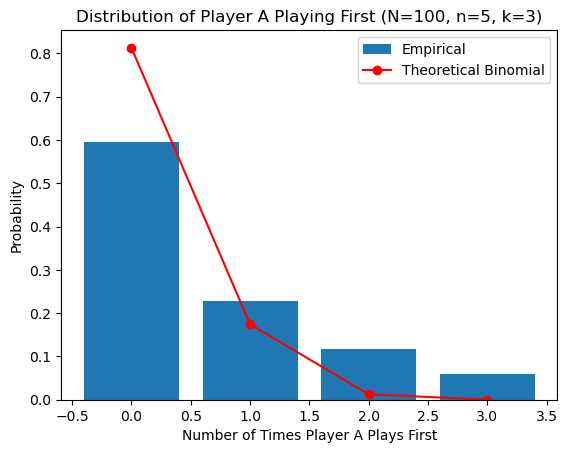

In [17]:
# To Do cell    

from scipy.stats import binom

def sample_game(N, n, k):
    # Simulate a single game (your sample_cards function)
    cards = sample_cards(N, n, k)

    # Identify Player A (e.g., the first player)
    player_A_cards = cards[0]

    # Count how many times Player A's card is the lowest
    count_success = 0
    for i in range(k):
        if player_A_cards[i] == min(cards[:, i]):
            count_success += 1
    
    return count_success

# Parameters
N = 100  # Total number of cards
n = 5    # Number of players
k = 3    # Number of cards per player
num_simulations = 1000  # Number of game simulations

# Simulate the games and collect the number of successes (Player A playing first)
results = []
for _ in range(num_simulations):
    success_count = sample_game(N, n, k)
    results.append(success_count)

# Plot the empirical distribution
plt.hist(results, bins=np.arange(0, k+2), align='left', rwidth=0.8, density=True, label='Empirical')

# Calculate and plot the theoretical binomial distribution
p_success = 1 / (n * k)  # Probability of Player A playing first
binom_dist = binom(k, p_success)
x = np.arange(0, k+1)
plt.plot(x, binom_dist.pmf(x), 'ro-', label='Theoretical Binomial')

plt.xlabel("Number of Times Player A Plays First")
plt.ylabel("Probability")
plt.title(f"Distribution of Player A Playing First (N={N}, n={n}, k={k})")
plt.legend()
plt.show()



### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

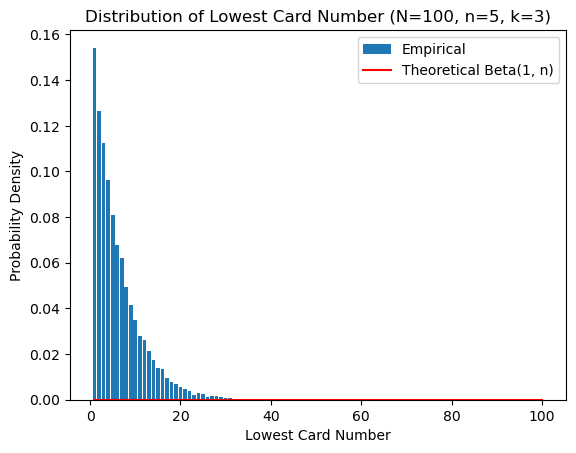

In [24]:
# # To Do cell

from scipy.stats import beta

# Parameters
N = 100  # Total number of cards
n = 5    # Number of players
k = 3    # Number of cards per player
num_samples = 10000  # Number of times to repeat the sampling

# Simulate the games and collect the lowest numbers
lowest_numbers = []

for _ in range(num_samples):
    cards = sample_cards(N, n, k)
    lowest_numbers.append(np.min(cards))

# Plot the histogram of the lowest numbers
plt.hist(lowest_numbers, bins=np.arange(1, N+2), align='left', rwidth=0.8, density=True, label='Empirical')

# Calculate and plot the theoretical Beta distribution
n_beta = 10  # Parameter n for the Beta distribution
beta_dist = beta(2, n_beta)
x = np.linspace(1, N, 1000)
plt.plot(x, beta_dist.pdf(x), 'r-', label='Theoretical Beta(1, n)')

plt.xlabel("Lowest Card Number")
plt.ylabel("Probability Density")
plt.title(f"Distribution of Lowest Card Number (N={N}, n={n}, k={k})")
plt.legend()
plt.show()




### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

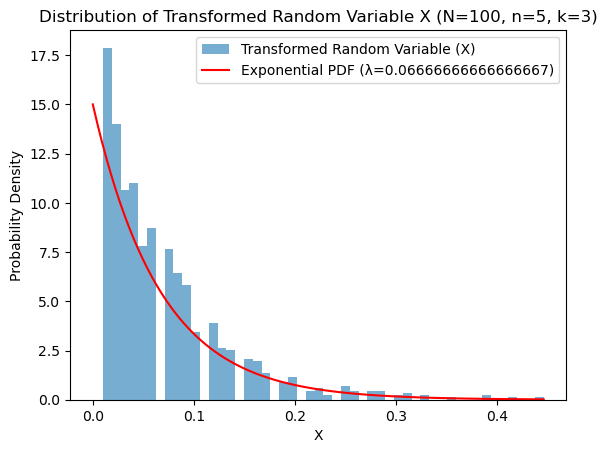

In [19]:
# To Do cell
from scipy.stats import expon

# Parameters
N = 100  # Total number of cards
n = 5    # Number of players
k = 3    # Number of cards per player
num_samples = 1000  # Number of times to repeat the sampling

# Simulate the games and collect the lowest numbers
lowest_numbers = []

for _ in range(num_samples):
    cards = sample_cards(N, n, k)
    lowest_numbers.append(np.min(cards))

# Compute the transformed random variable X
X = -np.log(1 - np.array(lowest_numbers) / N)

# Plot the histogram of the transformed variable X
plt.hist(X, bins=50, density=True, alpha=0.6, label='Transformed Random Variable (X)')

# Calculate and plot the PDF of an exponential random variable with parameter nk
parameter = n * k
x = np.linspace(0, max(X), 100)
pdf = expon.pdf(x, scale=1 / parameter)
plt.plot(x, pdf, 'r-', label=f'Exponential PDF (λ={1/parameter})')

plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title(f"Distribution of Transformed Random Variable X (N={N}, n={n}, k={k})")
plt.legend()
plt.show()


### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

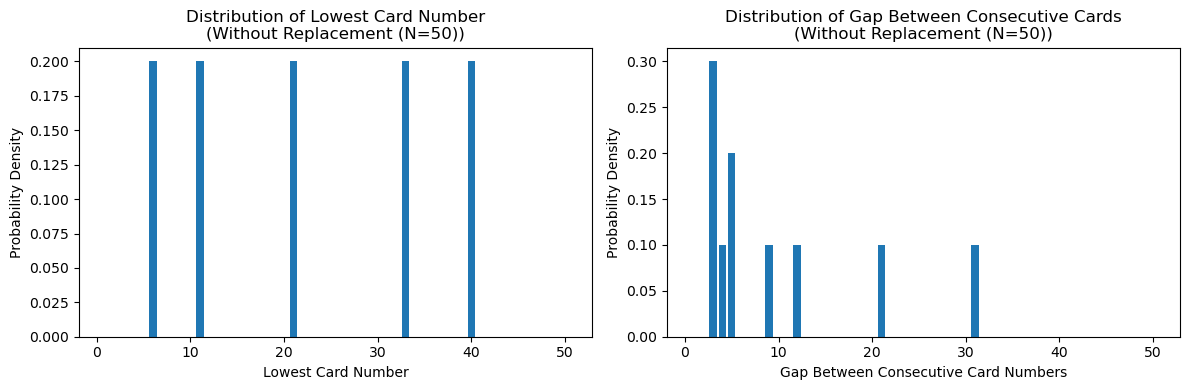

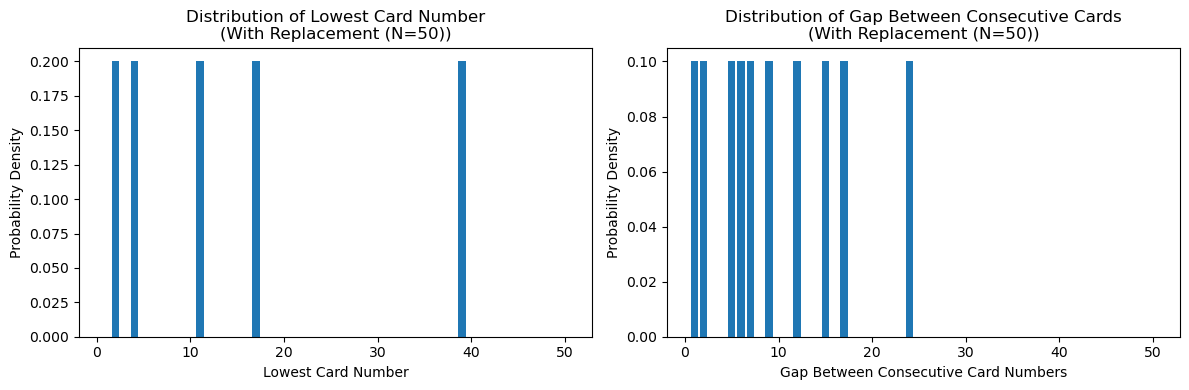

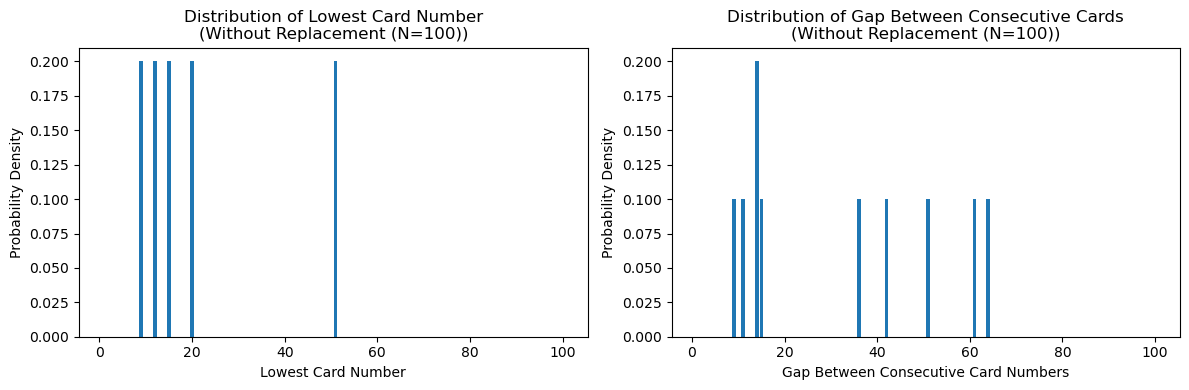

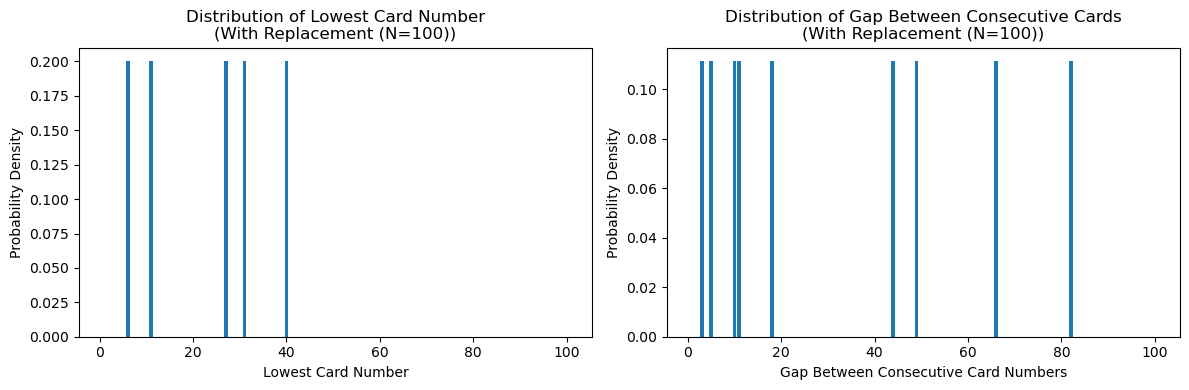

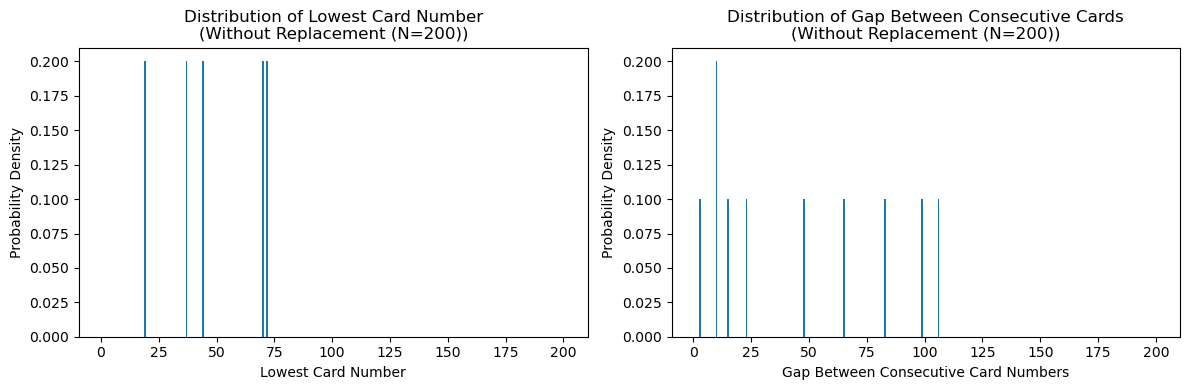

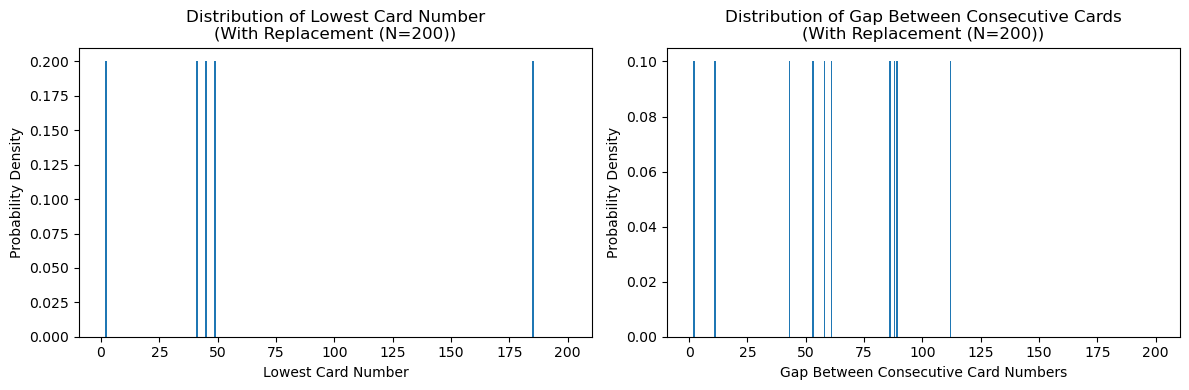

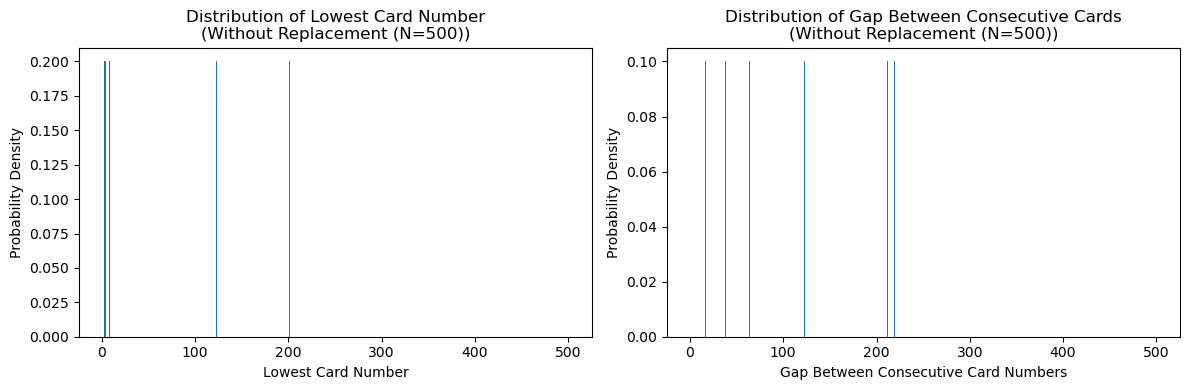

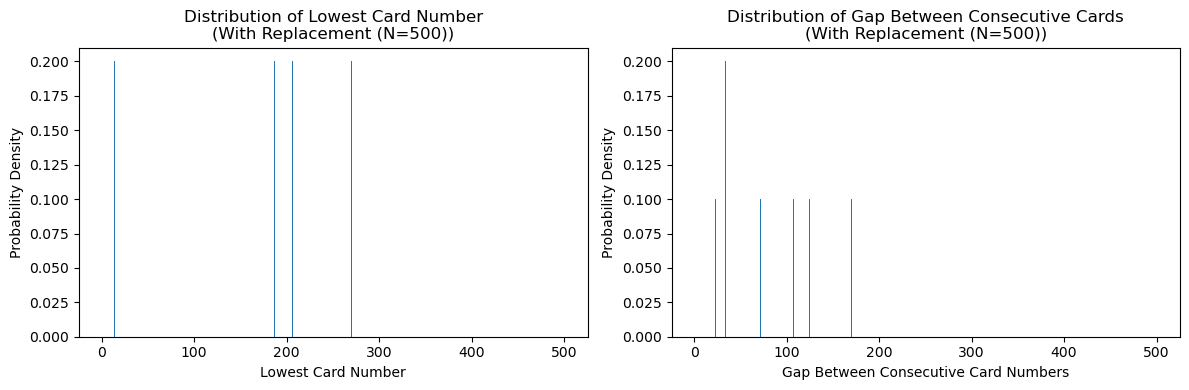

In [20]:
# To Do cell

def sample_cards_without_replacement(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players without replacement.
    """
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n, k)
    _cards.sort(axis=1)
    return _cards

def sample_cards_with_replacement(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players with replacement.
    """
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=True)
    _cards = _cards.reshape(n, k)
    _cards.sort(axis=1)
    return _cards

def plot_distribution(cards, title):
    """
    Plots the distribution of the lowest card number and the gap between consecutive card numbers.
    """
    lowest_numbers = np.min(cards, axis=1)
    gap_cards = np.diff(np.sort(cards))

    # Plot histogram of the lowest card number
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.hist(lowest_numbers, bins=np.arange(1, N+2), align='left', rwidth=0.8, density=True)
    plt.xlabel("Lowest Card Number")
    plt.ylabel("Probability Density")
    plt.title(f"Distribution of Lowest Card Number\n({title})")

    # Plot histogram of the gap between consecutive card numbers
    plt.subplot(1, 2, 2)
    plt.hist(gap_cards.flatten(), bins=np.arange(1, N+2), align='left', rwidth=0.8, density=True)
    plt.xlabel("Gap Between Consecutive Card Numbers")
    plt.ylabel("Probability Density")
    plt.title(f"Distribution of Gap Between Consecutive Cards\n({title})")

    plt.tight_layout()
    plt.show()

# Parameters
n = 5     # Number of players
k = 3     # Number of cards per player
num_samples = 1000  # Number of times to repeat the sampling

# Vary the number of cards (N)
N_values = [50, 100, 200, 500]

for N in N_values:
    # Sampling without replacement
    cards_without_replacement = sample_cards_without_replacement(N, n, k)
    plot_distribution(cards_without_replacement, f"Without Replacement (N={N})")

    # Sampling with replacement
    cards_with_replacement = sample_cards_with_replacement(N, n, k)
    plot_distribution(cards_with_replacement, f"With Replacement (N={N})")


### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Goktug Tufekci